<a href="https://colab.research.google.com/github/m-mazurkiewicz/PWR_MachineLearning/blob/AlexNet_master/AlexNetArchitecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D as Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

import sys
from keras.preprocessing.image import ImageDataGenerator, array_to_img, save_img
from matplotlib import pyplot as plt
import skimage.io as io
import numpy as np
import os
from tqdm import tqdm
from google.colab import drive

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
https://ce8aeb27.ngrok.io


In [2]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [0]:
num_of_classes = 4
base_dir_processed = '/content/gdrive/My Drive/PWr_AlexNet_data/processed/'
data_set = 'no-padding/resize/'

In [0]:
image_gen = ImageDataGenerator(
    featurewise_center=True,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=(0.5,1.5),
    shear_range=0.01,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    validation_split=0.1
)

In [0]:
number_of_images_for_fit = -1

all_images = []
for class_name in os.listdir(base_dir_processed + data_set + 'train'):
  for image_path in tqdm(os.listdir(base_dir_processed + data_set + 'train/' + class_name)[:number_of_images_for_fit]):
    img = io.imread(base_dir_processed + data_set + 'train/' + class_name + '/' + image_path)
    all_images.append(img)
x_train = np.array(all_images)

image_gen.fit(x_train)

generator = image_gen.flow_from_directory(
    base_dir_processed + data_set + '/' + 'train',
        target_size=(227,227),
        batch_size=128,
        class_mode='categorical',
        subset='training')

validation_generator = image_gen.flow_from_directory(
    base_dir_processed + data_set + '/' + 'train',
        target_size=(227,227),
        batch_size=128,
        class_mode='categorical',
        subset='validation')

100%|██████████| 1109/1109 [00:04<00:00, 252.42it/s]


In [18]:
# image_gen_val = ImageDataGenerator(featurewise_center=True)
# image_gen_val.fit(x_train)
# val_generator = image_gen_val.flow_from_directory(
#     base_dir_processed + data_set + '/' + 'test',
#         target_size=(227,227),
#         batch_size=128,
#         class_mode='categorical')

Found 1304 images belonging to 4 classes.


#Model

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

In [0]:
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

In [0]:
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))

In [0]:
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

In [0]:
model.add(Dense(4))
model.add(Activation('softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [0]:
hist = model.fit_generator(generator, steps_per_epoch=36, validation_data=validation_generator, validation_steps=4, epochs=100, verbose=1)
# hist = model.fit_generator(generator, samples_per_epoch=4693, validation_data=validation_generator, validation_steps=4, epochs=100, verbose=1)
# model.fit_generator(generator, batch_size=64, epochs=50, verbose=1)

#Plots

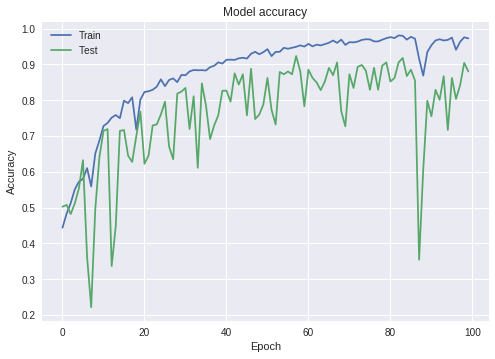

In [13]:
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

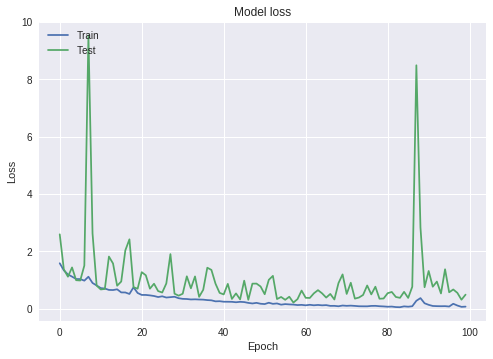

In [21]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Model saving/loading

In [0]:
model.save('gdrive/My Drive/alexNetModel1.h5')

In [0]:
model = load_model('gdrive/My Drive/alexNetModel1.h5')